# Homework 1
## Homework guideline
- The deadline is Sep 28th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

In [18]:
%pylab inline 
import numpy.linalg as LA
import numpy as np
import matplotlib.pyplot as plt


Populating the interactive namespace from numpy and matplotlib


# Q1: Low rank approximation (25pt)
In class we discussed SVD can be used to help matrix low rank approximation. Say the square matrix $X\in \mathbb{R}^{n\times n}$, the SVD for the matrix $X$ is $X = \sum_{i=1}^{n} \sigma_i u_i v_i^\top$. Let's explore this with the following image example. This is a very famous photo and many used it as the test example. 



---


### 1. load data

You don't need to do anything in this part. Feel free to comment. 

(256, 256)
65536
256


Text(0.5, 1.0, 'Matrix $X$ encoding a Grayscale Image\n(Rank, $r=$256)')

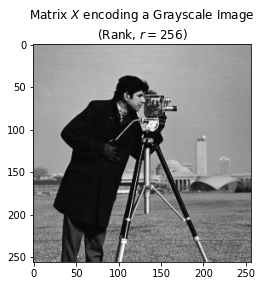

In [ ]:
img = plt.imread('https://github.com/yexf308/MAT592/blob/main/homework/HW1/cameraman.png?raw=true')
# we don't want to work on tensor. Let's turn it into a matrix 
# encode RGBa image as matrix of intensities, X
R = img[::, ::, 0]
G = img[::, ::, 1]
B = img[::, ::, 2] 
X = 0.2989 * R + 0.5870 * G + 0.1140 * B
X_rank = LA.matrix_rank(X, 0.)

# here are some basic information
print(X.shape)
print(X.size)
print(X_rank)

# Let's look at this image in grayscale. 
plt.imshow(X, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${X_rank})")



---
### 2. Plot Singular Values (5pt)
Perform the singular value decomposition and plot the singular values of this matrix in descending order. Print out top 20 singular values. 
Please comment your findings. Note this is very important in image compression. 



[1.25620392e+02 2.83491516e+01 2.14739895e+01 1.21881504e+01
 1.15062971e+01 9.48279476e+00 9.04047966e+00 7.13936567e+00
 6.60902882e+00 6.19678450e+00 6.01501274e+00 5.84414196e+00
 5.63146877e+00 5.58547163e+00 5.00643873e+00 4.69285488e+00
 4.47823095e+00 4.38100719e+00 3.90154076e+00 3.86446214e+00
 3.57381558e+00 3.36683702e+00 3.17900252e+00 3.13471007e+00
 3.06240726e+00 2.97532010e+00 2.86902761e+00 2.66739488e+00
 2.63521647e+00 2.62551212e+00 2.53119111e+00 2.44316363e+00
 2.38904405e+00 2.29093242e+00 2.23252845e+00 2.17395759e+00
 2.10015154e+00 2.07378793e+00 2.03298116e+00 1.97081399e+00
 1.96003366e+00 1.88764238e+00 1.85727024e+00 1.81429708e+00
 1.77060962e+00 1.70707285e+00 1.67869079e+00 1.67139125e+00
 1.62511289e+00 1.58519351e+00 1.54101467e+00 1.52355421e+00
 1.46562886e+00 1.41211009e+00 1.40127563e+00 1.36012983e+00
 1.33911228e+00 1.32089102e+00 1.28783047e+00 1.26409090e+00
 1.25091887e+00 1.22735107e+00 1.19647026e+00 1.16871035e+00
 1.16128635e+00 1.131299

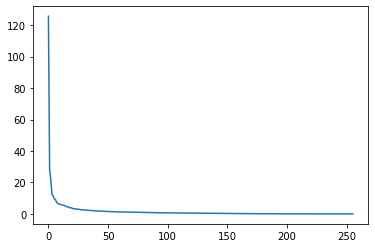

Top 20 singular values:
 [125.62039    28.349152   21.47399    12.18815    11.506297    9.482795
   9.04048     7.1393657   6.609029    6.1967845   6.0150127   5.844142
   5.631469    5.5854716   5.0064387   4.692855    4.478231    4.381007
   3.9015408   3.8644621]


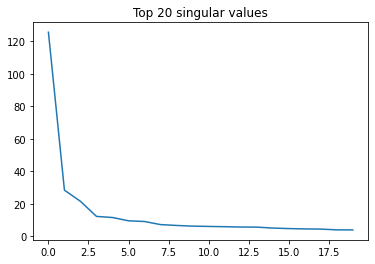

In [ ]:
U, S, V = LA.svd(X, full_matrices=False)

print(S)
print(U)
print(V)
plt.plot(S)#Ploting all the 'S' values.
plt.show()

print('Top 20 singular values:\n', S[0:20])#printing the descending order values of 's'
plt.plot(S[0:20])#Ploting the values of 'S' in descing order.
plt.title("Top 20 singular values")
plt.show()

## **Your Answer**:



---


### 3. Low rank approximation (10pt)

Find low rank approximation for the matrix $X$ with the rank 4, 8, and 16, $\hat{X}_4, \hat{X}_8, \hat{X}_{16}$. You don't need to print out the matrix, instead you can use _imshow_ to show the matrix in the image form, like I did in the first part. Please comment the quality of these image and the **compression rate**(Feel free to ask me if you don't know). 

<Figure size 432x288 with 0 Axes>

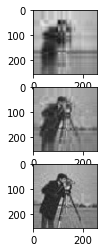

In [ ]:

def low_rank_approx(A=None, r=1):
    u, s, v = LA.svd(A, full_matrices=False)
    Ar = np.zeros((len(u), len(v)))
    for i in range(r):
        Ar += s[i] * np.outer(u.T[i], v[i])
    return Ar


X_4 = low_rank_approx(X, 4)

X_8 = low_rank_approx(X, 8)

X_16 = low_rank_approx(X, 16)

X_256 = low_rank_approx(X, 256)

plt.figure()

f, axarr = plt.subplots(3,1) 

axarr[0].imshow(X_4, cmap='gray')
axarr[1].imshow(X_8, cmap='gray')
axarr[2].imshow(X_16, cmap='gray')

## **Your Answer**:



---


### 4. Residue (10pt)
Print out the 2-norm of the residue for the low rank approximation. It is defined as $\|X-\hat{X}\|_2$. Compare these 2-norm of the residue with the singular values of the matrix $X$. Please comment on your findings.  

**Optional problem**: What if I change 2-norm to frobenius norm? 

In [ ]:
N_4 = norm(X-X_4)
N_8 = norm(X-X_8)
N_16 = norm(X-X_16)

print(N_4, N_8, N_16)

# The values are decreasing as it is getting more near to the real image as the rank increases.

30.397646110440064 23.85367497119117 17.509591248860257


## **Your Answer**:



---


## Q2:Monty Hall Problem (15pt)
Imagine a game show with the following rules: There are three doors, labelled 1, 2, 3. A single prize (e.g., a car) has been hidden behind one of them. You get to select one door. Then the gameshow host opens one of the other two doors (not the one you picked), in such a way as to not reveal the prize location. At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you
will receive whatever is behind your final choice of door.

For example, suppose you choose door 3, and the gameshow host opens door 1, revealing nothing behind the door, as promised. Should you (a) stick with door 3, or (b) switch to door 2, or (c) does it make no difference?

Please justify your answer in **your own language**.

## **Your Answer**: 
This is infamously called the monty hall problem:
Let's calculate the probability of each option the user has
1. If choice is not changed, that means the probability of winning is 1/3, since we choose 1 door randomly and always stick to it
2. This means, the probability of winning, when the choice is switched should be 1- 1/3 i.e 2/3
therefore, it makes more sense to switch the choice rather than to stick to the original choice.



---


# Q3:Prostate Cancer (35pt)
**Background**: The data for this example come from a study by Stamey et al. (1989) that examined the correlation between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were about to receive a radical prostatectomy.
The goal is to predict the log of PSA (lpsa) from a number of measurements.

Variables:

|         |                                                       |
|---------|-------------------------------------------------------|
|lpsa     |log prostate specific antigen                          |
|lcavol   |log cancer volume                                      |
|lweight  |log prostate weight                                    |
|age      |age                                                    |
|lbph     |log of benign prostatic hyperplasia amount             |
|svi      |seminal vesicle invasion                               |
|lcp      |log of capsular penetration                            |
|gleason  |Gleason score                                          |
|pgg45    |percent of Gleason scores 4 or 5                       |



---


### 1.Load and Prepare Data

The following code loads the the prostate cancer data set. You can see there are 8 features and 97 cases. We divide the dataset into two parts: the 67 cases as training set (in Xtrain and ytrain) and the 30 cases as test set (in Xtest and ytest). You don't need to do anything in this part.

In [17]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true -O prostateStnd.mat
data = loadmat('prostateStnd.mat')
names = list(map(lambda x: x[0], data['names'][0]))
Xtrain, ytrain = data['Xtrain'], data['ytrain']
Xtest, ytest   = data['Xtest'], data['ytest']
print(names)
print(Xtrain.shape)
print(Xtest.shape)


--2021-10-01 12:41:10--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MAT592/raw/main/homework/HW1/prostateStnd.mat [following]
--2021-10-01 12:41:10--  https://github.com/yexf308/MAT592/raw/main/homework/HW1/prostateStnd.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/prostateStnd.mat [following]
--2021-10-01 12:41:11--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/prostateStnd.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... con



---



### 2. Coefficient of Determination (5pt)
Please write a function to calculate **Coefficient of Determination**
$$ R^2= 1- \frac{\sum_{n=1}^N(\hat{y}_n-y_n)^2}{\sum_{n=1}^N(\bar{y}-y_n)^2}$$

In [19]:
import math

def r2_score(ytrue, ypred):

  mean = np.mean(ytrue);

  numerator = 0
  for i in range(len(ytrue)):
    numerator += (ytrue[i] - ypred[i])**2
  print(numerator)
  denominator = 0
  for i in range(len(ytrue)):
    denominator += (mean - ytrue[i])**2
  print(denominator)
  k = 1 - numerator/denominator
  print(k)
  return k
  # Your code starts here



---


### 3. Least Square (10pt)

Please perform the linear regression with least squares. Use the function defined above to calculate coefficient of determination.
Use this model to calculate the RSS(residual sum of squares) on the test set. Do you think we have the overfitting issue?

## **Your Answer**:

In [ ]:

q, r = np.linalg.qr(Xtest)
p = np.dot(q.T, ytest)
B=np.dot(np.linalg.inv(r), p)
print(B)

yHat = Xtest.dot(B)
y_residue1 = ytest - yHat

def RSS(y_residue):
  return 1/2 * np.sum(y_residue**2)

print(RSS(y_residue1))  

[[ 0.86975103]
 [ 0.43200124]
 [-0.98260032]
 [ 0.63847556]
 [ 0.26240375]
 [ 0.26927144]
 [ 0.85356294]
 [-1.30040982]]
74.59697629343451


In [ ]:
print(r2_score(ytest,y_residue1))

[75.31744871]
[31.48929856]
[-1.39184269]
[-1.39184269]


In [22]:
P,q=Xtest. shape
X2 = np.ones((p,1));
k=np.column_stack((X2, Xtest))
q, r = np.linalg.qr(k)
S= np.linalg.solve(r,q.T.dot(ytest))
L=np.dot(np.linalg.inv(r), S)
yHat= k.dot(S)
res1 = ytest- yHat
def RSS (res) :
 return 1/2 * np.sum(np.power(res1,2))
 
print (RSS (res1))
print (r2_score(ytest, yHat))

4.775739873717906
[9.55147975]
[31.48929856]
[0.69667537]
[0.69667537]




---


### 4. Ridge Regression (10pt)

Please perform the Ridge regression. Use the RSS on the test data to find the optimal penalty parameter $\lambda$. Also calculate coefficient of determination. Compare with the least square, do you have any improvement? 

In [ ]:
# Your code starts here. You may use the functions defined in class.
from sklearn.linear_model import Ridge

clf = Ridge(alpha=1.0)
clf.fit(Xtrain, ytrain)

y_predict = clf.predict(Xtest)

print(clf.get_params())
print(r2_score(ytest, y_predict))


{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
[17.3220619]
[31.48929856]
[0.44990639]
0.6707506173294878


## **Your Answer**:



---


### 5. LASSO (10pt)

Please test LASSO with different choices of $\lambda$, plot the regularization path, i.e, the coefficients vs the $\lambda$ for each **feature**. Please use this path to perform the **feature selection**, then re-estimate the chosen coefficients using least squares (**debiasing**). 



In [ ]:
# Your code starts here. You may use the functions defined in class.

## **Your Answer**:



---


# Q4: Robust linear regression (25pt)



The data set _regression_outlier.mat_ contains the feature vector $\mathbf{x}$ and response vector $\mathbf{y}$, but one of the point is an outlier.  In this case, we consider the robust linear regression or the so-called least absolute deviation (LAD) problem
  \begin{align*}
(w_0^*,w_1^*) = \arg\min_{w_0,w_1} \; \sum_{i=1}^n |y^{(i)} - w_0 -w_1 x^{(i)}|
  \end{align*}



--2021-09-28 06:11:29--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/regression_outlier.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MAT592/raw/main/homework/HW1/regression_outlier.mat [following]
--2021-09-28 06:11:29--  https://github.com/yexf308/MAT592/raw/main/homework/HW1/regression_outlier.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/regression_outlier.mat [following]
--2021-09-28 06:11:29--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/regression_outlier.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

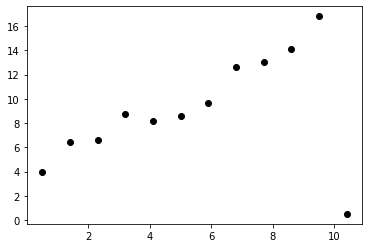

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/regression_outlier.mat?raw=true -O regression_outlier.mat
data = loadmat('regression_outlier.mat')
X, Y=data['x_train'], data['y_train']
fig, ax = plt.subplots()
plt.plot(X,Y,'o',color='black')



---



1.   (15pt) Solve the  above optimization problem for the given data set. You may simply use the subroutine _scipy.optimize_. Create a figure to plot the data points $\{ (x^{(i)}, y^{(i)}) \}_{i=1}^n$ and the LAD regression line. Label the axes. Briefly discuss about your findings.









In [ ]:
from scipy.optimize import minimize
## Your code starts here



## **Your Answer**:



---


2.   (10pt) Solve the corresponding least squares (LS) problem:
\begin{align*}
\min_{w_0,w_1} \; \sum_{i=1}^n (y^{(i)} - w_0 -w_1 x^{(i)})^2
  \end{align*}
  Plot the obtained least square regression line (in different style and color) in the same figure as in part 1. Briefly discuss about your findings.


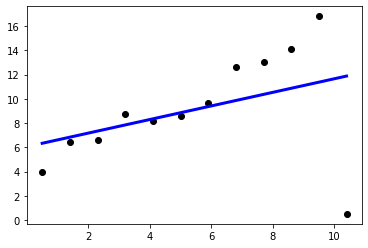

In [ ]:
## Your code starts here

from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)

pred = reg.predict(X)
plt.scatter(X, Y,  color='black')
plt.plot(X, pred, color='blue', linewidth=3)

## **Your Answer**: 

[[1.39853591]]


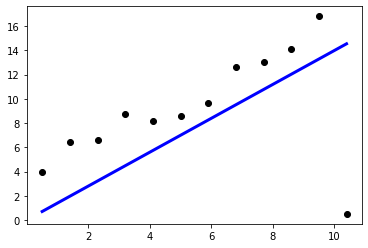

In [ ]:
q, r = np.linalg.qr(X)
p = np.dot(q.T, Y)
B=np.dot(np.linalg.inv(r), p)
print(B)

yHat = X.dot(B)
y_residue1 = Y - yHat
plot(X,Y,'o',color='black');
plot(X,yHat,color='blue', linewidth=3);



---

